In [ ]:
#SUPPORT VECTOR MACHINE - SUPPORT VECTOR CLASSIFIER(similar to Logistic Regression)

s =['Congrats.You have won lottery and if you want lottery money call the lottery number and get your money',
    'Give your bank details for lottery money',
    'lottery for sure if bank details are verified']

s

['Congrats.You have won lottery and if you want lottery money call the lottery number and get your money',
 'Give your bank details for lottery money',
 'lottery for sure if bank details are verified']

In [ ]:
type(s)

list

In [ ]:
#TOKENISATION - Splitting up of data into different values called tokens
s[1].split()

['Give', 'your', 'bank', 'details', 'for', 'lottery', 'money']

In [ ]:
#COUNT VECTORIZER - Tells us the importance of a word in a sentence in terms of frequency
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')
#stopwords are english words which do not add much meaning to a sentence(and,the,for,of,if,are)
op = vect.fit_transform(s).toarray()#text is transformed into numbers
#The The transformation is done in such a way ,that the meaning of the sentence is not sacrificed


In [ ]:
op

array([[0, 1, 0, 3, 2, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 0]])

In [ ]:
import pandas as pd
df = pd.DataFrame(op,columns = vect.get_feature_names_out())
df

,bank,congrats,details,lottery,money,number,sure,verified,want,won
0,0,1,0,3,2,1,0,0,1,1
1,1,0,1,1,1,0,0,0,0,0
2,1,0,1,1,0,0,1,1,0,0


In [ ]:
#Support Vector Classifier (SVC Model)
#dataset - spam ham dataset
#dataset - https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv

In [ ]:
#1.Take the data and create dataframe
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv',sep = '\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
df.shape #5572 rows and 4 cols

(5572, 4)

In [ ]:
df.size

22288

In [ ]:
#Now I want to check the exact number of SPAM and HAM messages
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: >

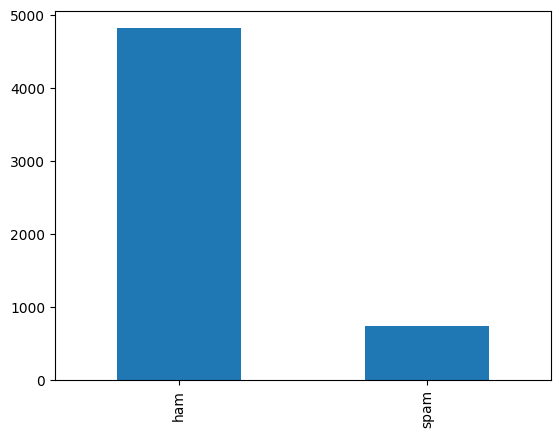

In [ ]:
#3.VISUALISATION
df['label'].value_counts().plot(kind = 'bar')

In [ ]:
#4.Divide the data into input and output
#INput - Message,output - label
x = df.iloc[:,1].values #Only when text messages are involved , input is 1 dimensional
y = df.iloc[:,0].values
print(x)
print(y)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [ ]:
#5.Train test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
#6.Apply Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [ ]:
#7.Apply a CLASSIFIER/REGRESSOR/CLUSTERER
from sklearn.svm import SVC
model = SVC()

In [ ]:
#8.Model fitting
model.fit(x_train_v,y_train) #We are training the model here

SVC()

In [ ]:
#9.Predict the output
y_pred = model.predict(x_test_v)
y_pred#PREDICTED OUTPUT VALUES

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_test #ACTUAL OUTPUT VALUES

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [ ]:
#10.Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

98.56424982053123

In [ ]:
#Individual prediction/Evaluating a specific message
a = df['message'][10]
a

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
a = vect.transform([a])
model.predict(a)

array(['ham'], dtype=object)

In [ ]:
b = df['message'][12]
b

'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [ ]:
b = vect.transform([b])
model.predict(b)

array(['spam'], dtype=object)

In [ ]:
#Evaluating a CUSTOM MESSAGE
c = 'win free tickets today'
c

'win free tickets today'

In [ ]:
c = vect.transform([c])
model.predict(c)

array(['spam'], dtype=object)

In [ ]:
#1.Gathered data and created dataframe and then divided data into i/p and o/p
#2.Applied train_test_split
#3.Applied Tfidf Vectorizer
#4.Applied SVC
#5.Predicted the output
#6.Accuracy

In [ ]:
#If I have to create any web app ,I will have to perform pipelining
#Pipelining - Combining 2 or more modules
#So here we combine/pipeline SVC and Tfidf Vectorizer

In [ ]:
#pipelining
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(TfidfVectorizer(),SVC())

In [ ]:
#Now let us fit the pipelined model
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
#Predict the model
y_pred1 = text_model.predict(x_test)
y_pred1 #PREDICTED OUTPUT VALUES

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_test #ACTUAL OUTPUT VALUES

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [ ]:
#Accuracy of the pipelined model
accuracy_score(y_pred1,y_test)*100

98.56424982053123

In [ ]:
#Evaluating a CUSTOM MESSAGE
d = 'win free tickets today'
d

'win free tickets today'

In [ ]:
d = vect.transform([d])
model.predict(d)

array(['spam'], dtype=object)

In [ ]:
#JOBLIB - 2 different types - 1.Dump 2.Load
import joblib
joblib.dump(text_model,'spam-ham')

['spam-ham']

In [ ]:
#ASSIGNMENT 2 - 18th June last date


#ASSIGNMENT 3 - 24th June last date
#CReate any model of your choice for web scraping

In [ ]:
#Google Drive link
#tinyurl.com/teachnookds1